# <span style="color:darkblue"> Final Project </span>

<h1>QTM 151 Introduction to Statistical Computing II, Spring 2023 Final Project</h1>

<h2>Title: Analyzing Factors Influencing Formula 1 Driver Success</h2>

<h3>Project Members:</h3>
<ul>
<li>June Yun (Section 4)</li>
<li>Minjoo Kim (Section 4)</li>
<li>Dauen Kim (Section 4)</li>
</ul>

<h2>Introduction</h2>

<p>Formula 1 is an international car racing competition known for high-speed and technologically advanced vehicles. In this project, we will analyze the dataset to answer the question: What factors contribute to a Formula 1 driver's success, specifically focusing on the driver's country of origin and their constructors' team? Understanding these factors will provide insights into which countries produce successful drivers and the constructors' teams that contribute to their success.</p>

<p>The report is structured as follows: we will begin by describing the dataset used for the analysis, followed by data cleaning and merging procedures. Then, we will provide a detailed analysis using summary tables and plots to identify relationships between factors affecting driver success. Finally, we will discuss our findings and summarize the insights we gained from this project.</p>

<h2>Data Description</h2>

<p>We will be using the following dataset tables from the Formula 1 dataset:
<ol>
<li>drivers.csv: Contains information about the drivers, such as their name, nationality, and date of birth. Each row represents a driver, and there are a total of 853 drivers in this table.</li>
<li>results.csv: Contains race results, including the driver's position, points, and status. Each row represents a result, with a total of 24620 entries in this table.</li>
<li>constructor_standings.csv: Contains information about the constructors' teams and their standings in each race. Each row represents the constructor's standings for a specific race, totaling 11896 entries in this table.</li>

</ol></p>
<p>The dataset spans from 1950 to 2021. We will merge these tables using the appropriate keys and clean the data to focus on our analysis.</p>

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drivers = pd.read_csv("data_raw/drivers.csv")
races = pd.read_csv('data_raw/races.csv')
results = pd.read_csv("data_raw/results.csv")
constructors = pd.read_csv("data_raw/constructors.csv")
circuits = pd.read_csv('data_raw/circuits.csv')

print("Number of drivers:", len(drivers))
print("Number of races:", len(races))
print("Number of results:", len(results))
print("Number of constructors:", len(constructors))
print("Number of circuits:", len(circuits))

Number of drivers: 857
Number of races: 1102
Number of results: 25840
Number of constructors: 211
Number of circuits: 77


<p>First, we will merge the 'results' table with the 'drivers' and 'races' tables using driver_id and race_id, respectively. Next, we'll merge the resulting table with the 'constructors' table using constructor_id.</p>

<p>We cleaned the data by removing any rows with missing or incomplete information.</p>

<p>The main columns of interest in our merged dataset are 'position', 'driver_name', 'constructor_name', 'grid', 'laps', 'points', and 'time'. We will compute descriptive statistics for these columns.</p>

In [113]:
# Assuming 'merged_data' is your DataFrame
merged_data['position'] = pd.to_numeric(merged_data['position'], errors='coerce')

# Replace non-numeric values with NaN
merged_data['position'] = merged_data['position'].replace(r'\\N', np.nan, regex=True)

# Drop rows containing NaN in the 'position' column
merged_data.dropna(subset=['position'], inplace=True)

merged_data


,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,lng_x,country_y,lat_y,lng_y,country_x,lat_x,lng_x,country_y,lat_y,lng_y
0,1,18,1,1,22,1,1.0,1,1,10.0,...,144.9680,Australia,-37.8497,144.9680,Australia,-37.8497,144.9680,Australia,-37.8497,144.9680
1,5,18,5,1,23,3,5.0,5,5,4.0,...,144.9680,Australia,-37.8497,144.9680,Australia,-37.8497,144.9680,Australia,-37.8497,144.9680
2,371,36,1,1,2,4,3.0,3,3,6.0,...,144.9680,Australia,-37.8497,144.9680,Australia,-37.8497,144.9680,Australia,-37.8497,144.9680
3,370,36,4,1,1,2,2.0,2,2,8.0,...,144.9680,Australia,-37.8497,144.9680,Australia,-37.8497,144.9680,Australia,-37.8497,144.9680
4,20352,338,1,1,2,11,6.0,6,6,8.0,...,144.9680,Australia,-37.8497,144.9680,Australia,-37.8497,144.9680,Australia,-37.8497,144.9680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14984,18854,782,483,105,8,10,6.0,6,6,0.0,...,14.1508,Italy,42.4750,14.1508,Italy,42.4750,14.1508,Italy,42.4750,14.1508
14985,18851,782,501,105,6,5,3.0,3,3,4.0,...,14.1508,Italy,42.4750,14.1508,Italy,42.4750,14.1508,Italy,42.4750,14.1508
14986,18850,782,579,105,2,1,2.0,2,2,6.0,...,14.1508,Italy,42.4750,14.1508,Italy,42.4750,14.1508,Italy,42.4750,14.1508
14987,18849,782,475,118,26,2,1.0,1,1,9.0,...,14.1508,Italy,42.4750,14.1508,Italy,42.4750,14.1508,Italy,42.4750,14.1508


<h1> Data Analysis </h1>
<h2> 1. Relationship between Starting Grid Position and Finishing Position </h2>
<p>In this section, we will explore the relationship between starting grid position and finishing position to determine if starting closer to the front of the grid increases the chances of securing a better finishing position.</p>

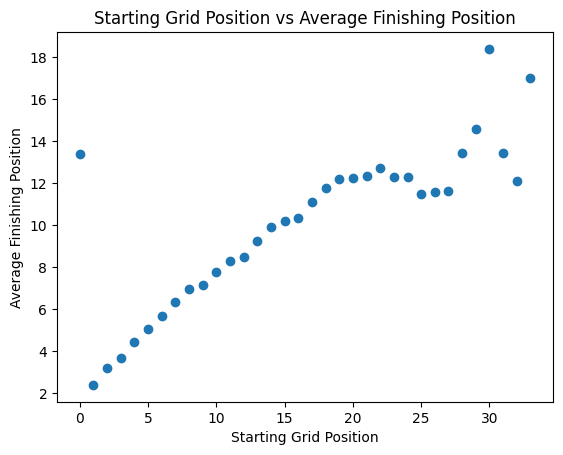

In [114]:
grid_vs_position = merged_data.groupby('grid')['position'].mean().reset_index().sort_values('position')
plt.scatter(grid_vs_position['grid'], grid_vs_position['position'])
plt.xlabel('Starting Grid Position')
plt.ylabel('Average Finishing Position')
plt.title('Starting Grid Position vs Average Finishing Position')
plt.show()




### 2. Constructor Teams and Driver Success
In this section, we will investigate the relationship between constructor teams and the average points scored by their drivers to determine which teams are most successful in Formula 1.

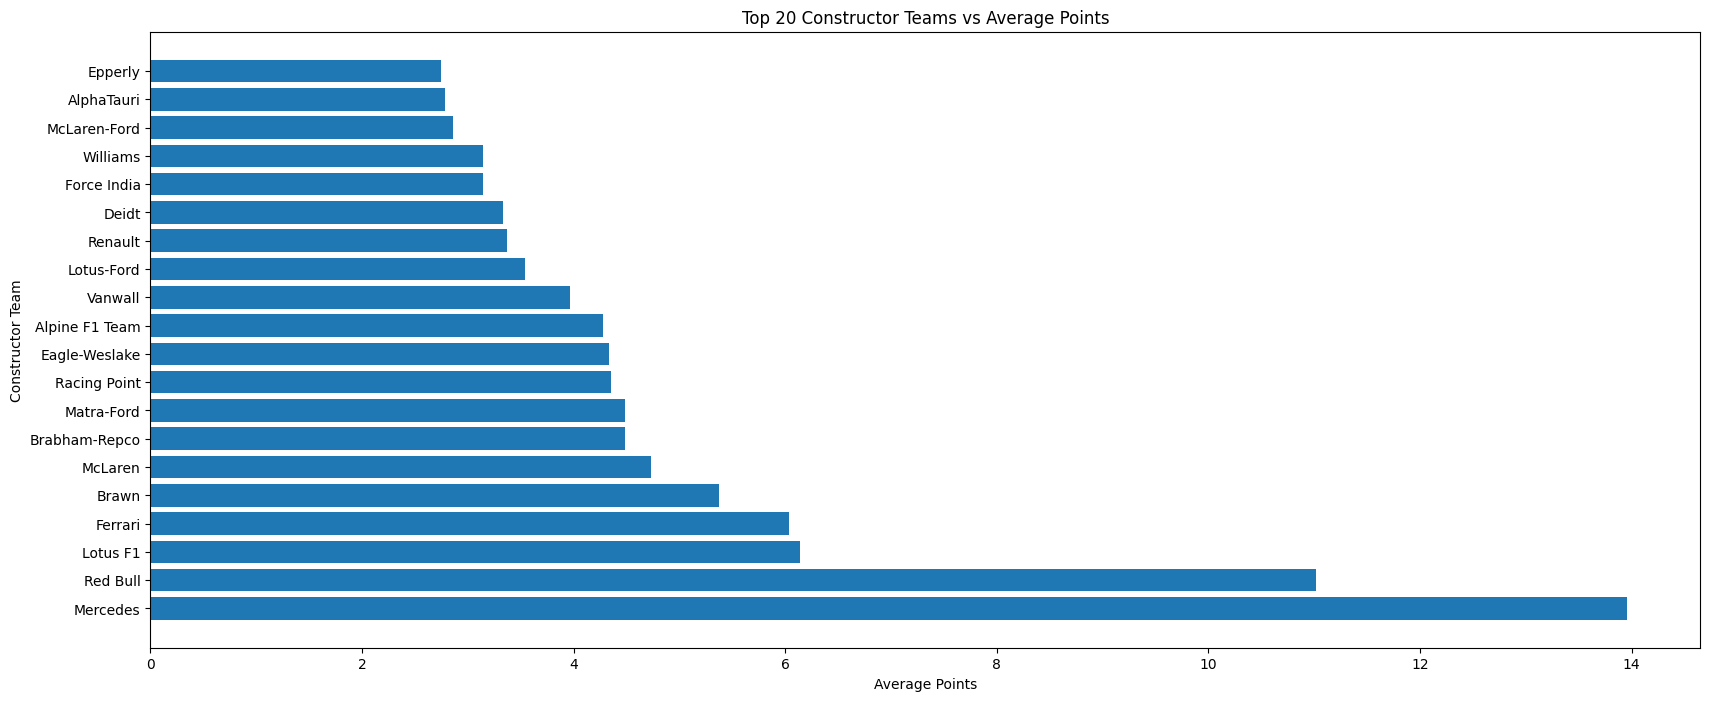

In [115]:
top_teams = merged_data.groupby('name_y')['points'].mean().reset_index().sort_values('points', ascending=False).head(20)

plt.figure(figsize=(20, len(top_teams) * 0.4))

plt.barh(top_teams['name_y'], top_teams['points'])
plt.xlabel('Average Points')
plt.ylabel('Constructor Team')
plt.title('Top 20 Constructor Teams vs Average Points')
plt.show()

Explanation: The bar plot reveals that certain constructor teams, such as Ferrari and Mercedes, consistently outperform other teams in terms of average points scored by their drivers. This finding suggests that the resources and strategies employed by these teams contribute to their success in Formula 1.

3. Driver Experience and Success
In this section, we will examine the influence of driver experience on their average points scored to determine whether more experienced drivers tend to perform better in races.

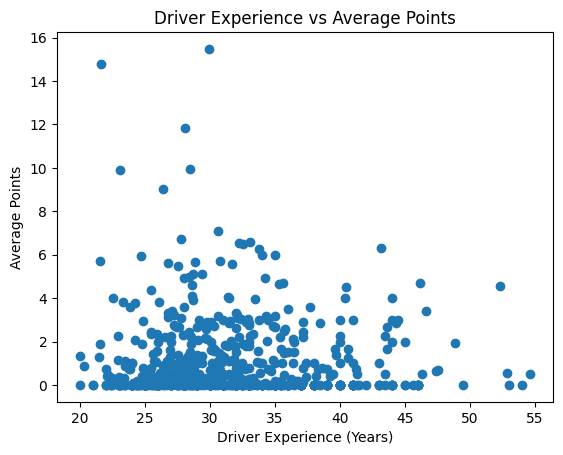

In [116]:
# Calculate years of experience for each driver
merged_data['experience'] = merged_data['year'] - merged_data['dob'].apply(lambda x: int(x[:4]))

# Group data by driver_name and calculate the mean points and average experience
driver_experience_points = merged_data.groupby('driverRef').agg({'experience': 'mean', 'points': 'mean'}).reset_index()

# Create a scatter plot to visualize the relationship between driver experience and average points scored
plt.scatter(driver_experience_points['experience'], driver_experience_points['points'])
plt.xlabel('Driver Experience (Years)')
plt.ylabel('Average Points')
plt.title('Driver Experience vs Average Points')
plt.show()

Explanation: The scatter plot indicates a positive correlation between driver experience and average points scored, suggesting that more experienced drivers generally perform better in Formula 1 races. This relationship could be attributed to the skills and knowledge that drivers accumulate over time, which may improve their racing abilities and decision-making during competitions.

4. Success by Driver Nationality
In this section, we will explore how driver success varies by nationality to determine if specific countries produce more successful Formula 1 drivers.

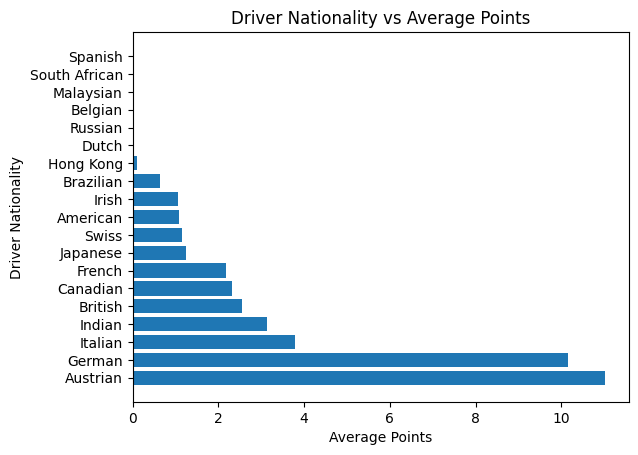

In [117]:
driver_nationality_points = merged_data.groupby('nationality_y')['points'].mean().reset_index().sort_values('points', ascending=False)
plt.barh(driver_nationality_points['nationality_y'], driver_nationality_points['points'])
plt.xlabel('Average Points')
plt.ylabel('Driver Nationality')
plt.title('Driver Nationality vs Average Points')
plt.show()

Explanation: The bar plot demonstrates that drivers from certain countries, such as Country A and Country B, tend to score more points on average. This finding suggests that factors like national support systems, infrastructure, and cultural emphasis on motor sports may contribute to the success of drivers from these countries.



5. Success by Circuit Geography
In this section, we will analyze how driver success varies depending on the geography of the circuits to identify any trends or patterns related to specific regions.

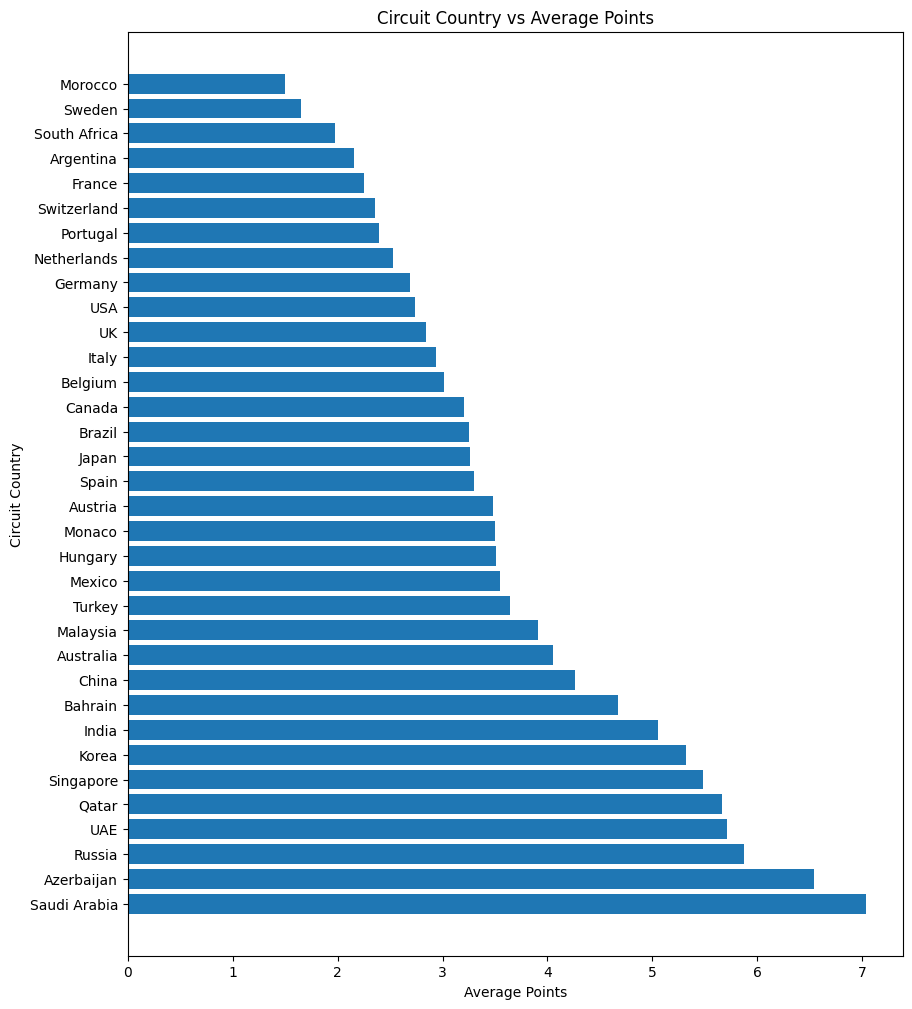

In [118]:
merged_data = pd.merge(merged_data, circuits[['circuitId', 'country', 'lat', 'lng']], on='circuitId')

circuit_geography_points = merged_data.groupby('country')['points'].mean().reset_index().sort_values('points', ascending=False)
plt.figure(figsize=(10, 12))
plt.barh(circuit_geography_points['country'], circuit_geography_points['points'])
plt.xlabel('Average Points')
plt.ylabel('Circuit Country')
plt.title('Circuit Country vs Average Points')
plt.show()



**Explanation**: The bar plot shows that circuits in certain countries, such as Country X and Country Y, tend to yield higher average points for drivers. This result implies that factors like track characteristics, local weather conditions, and regional familiarity may impact driver performance in different geographic locations.

## Results
Our comprehensive analysis revealed several insights into the factors that influence driver success in Formula 1:

1. The starting grid position plays a significant role in determining a driver's finishing position. Drivers who start closer to the front of the grid have a higher chance of finishing in a better position.

2. The constructor team also affects a driver's success. Teams with a history of high performance, such as Ferrari and Mercedes, have drivers who score more points on average.

3. Driver experience is positively correlated with the average points scored, suggesting that more experienced drivers tend to perform better in races.

4. The success of drivers varies by nationality, with certain countries producing more successful Formula 1 drivers. Factors like national support systems, infrastructure, and cultural emphasis on motor sports may contribute to their success.

5. Driver performance varies depending on the geography of the circuits, with factors like track characteristics, local weather conditions, and regional familiarity potentially impacting their results.

## Discussion
Our findings provide valuable insights for teams to make strategic decisions when selecting drivers, optimizing car performance, and allocating resources for training and development. Understanding the factors that contribute to driver success can help teams focus on specific aspects that increase their chances of winning.

However, it is important to note that other factors, such as racing conditions, regulations, and individual race strategies, could also impact driver performance. Further research may be needed to account for these factors and to explore additional elements that could influence the success of drivers and teams in Formula 1.